# Introduction

Here I want to figure out if $p_i = b_i$ or what


### Path graph

(array([0.00827586, 0.0162069 , 0.02344828, 0.03      , 0.03586207,
        0.04103448, 0.04551724, 0.04931034, 0.05241379, 0.05482759,
        0.05655172, 0.05758621, 0.05793103, 0.05758621, 0.05655172,
        0.05482759, 0.05241379, 0.04931034, 0.04551724, 0.04103448,
        0.03586207, 0.03      , 0.02344828, 0.0162069 , 0.00827586]),
 array([0.00467399, 0.01365597, 0.02186396, 0.02917494, 0.03562893,
        0.04134392, 0.04624991, 0.0503839 , 0.05381089, 0.05646889,
        0.05833988, 0.05949588, 0.05987388, 0.05947188, 0.05838488,
        0.05656989, 0.05388989, 0.0503109 , 0.04606191, 0.04111092,
        0.03533693, 0.02875294, 0.02136496, 0.01325997, 0.00451999]))

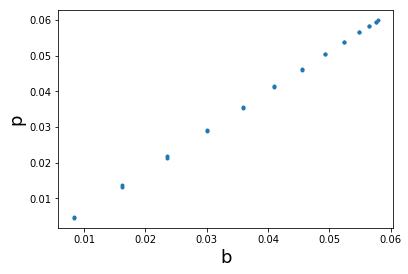

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes, T = 25, 10**6
G = nx.path_graph(num_nodes)
bs_path = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_path = bs_path / sum(bs_path)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_path = counts / sum(counts)
plt.plot(bs_path,counts_path,'.')
plt.xlabel('b', fontsize=18);plt.ylabel('p', fontsize=18)
#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

bs_path, counts_path

## 2D lattice

Text(0,0.5,'p')

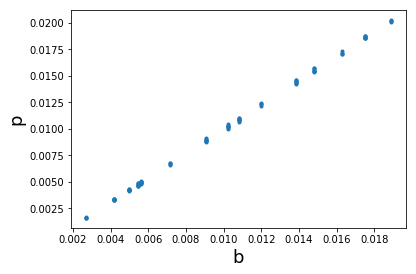

In [181]:
T = 10**6
num_nodes_per_side = 10
G = nx.grid_2d_graph(num_nodes_per_side,num_nodes_per_side)
G = nx.convert_node_labels_to_integers(G)

bs_2dlattice = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_2dlattice -= np.ones(G.number_of_nodes())
bs_2dlattice = bs_2dlattice / sum(bs_2dlattice)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_2dlattice = counts / sum(counts)
plt.plot(bs_2dlattice,counts_2dlattice,'.')
plt.xlabel('b', fontsize=18);plt.ylabel('p', fontsize=18)
#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

[ 1.15000794 -0.00150008]


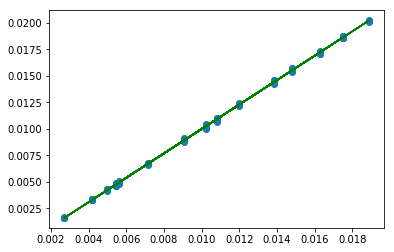

In [183]:
from scipy.optimize import curve_fit

def func(N,m,c):
    return m*N + c
popt, pcov = curve_fit(func,bs_2dlattice,counts_2dlattice)
print popt

plt.plot(bs_2dlattice,counts_2dlattice,'o')
plt.plot(bs_2dlattice, func(bs_2dlattice, *popt), 'g--')

### Erdos Renyii

Text(0,0.5,'p')

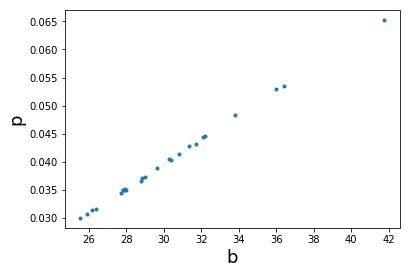

In [141]:
num_nodes, T = 25, 10**6

G = nx.erdos_renyi_graph(num_nodes, 0.5)
bs_ER = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
#bs_ER = bs_ER / sum(bs_ER)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_ER = counts / sum(counts)
plt.plot(bs_ER,counts_ER,'.')
plt.xlabel('b', fontsize=18);plt.ylabel('p', fontsize=18)

### Scale free

Text(0,0.5,'p')

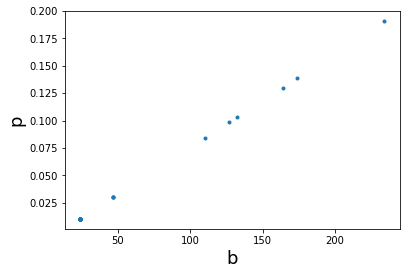

In [147]:
num_nodes, T = 25, 10**6

G = nx.barabasi_albert_graph(num_nodes, 1)
bs_SF = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
#bs_ER = bs_ER / sum(bs_ER)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_SF = counts / sum(counts)
plt.plot(bs_SF,counts_SF,'.')
plt.xlabel('b', fontsize=18);plt.ylabel('p', fontsize=18)

### Altogether

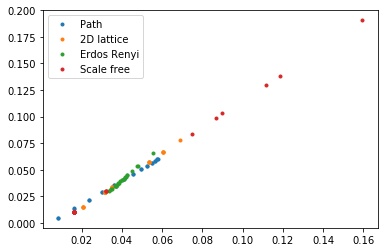

In [150]:
plt.plot(bs_path / sum(bs_path),counts_path,'.')
plt.plot(bs_2dlattice / sum(bs_2dlattice), counts_2dlattice,'.')
plt.plot(bs_ER / sum(bs_ER), counts_ER,'.')
plt.plot(bs_SF / sum(bs_SF), counts_SF,'.')
#plt.plot(np.linspace(0,max(bs_ER),10),np.linspace(0,max(bs_ER),10),'k-')
plt.legend(['Path', '2D lattice', 'Erdos Renyi', 'Scale free'])

### Roughwork

In [167]:
num_nodes, T = 4, 10**5
G = nx.path_graph(num_nodes)
bs_path = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_path -= np.ones(G.number_of_nodes())
bs_path = bs_path / sum(bs_path)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_path = counts / sum(counts)
bs_path, counts_path

(array([0.16666667, 0.33333333, 0.33333333, 0.16666667]),
 array([0.1501785, 0.3495865, 0.3498265, 0.1504085]))

In [168]:
num_nodes, T = 4, 10**4
G = nx.path_graph(num_nodes)
bs_path = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_path -= np.ones(G.number_of_nodes())
bs_path

array([2., 4., 4., 2.])

### Adjusted betweeness

In [166]:
from funcs import *
G = nx.path_graph(num_nodes)

nodes = [node for node in G.nodes()]
Ts = []
trial = 0
paths = compute_and_save_all_shortest_paths(G)

for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        start, end = nodes[i], nodes[j]
        current_position = start

        #Pick one of possibly many shortest paths
        all_shortest_paths = paths[current_position][destination]
        temp = np.random.choice(range(len(all_shortest_paths)))
        path = all_shortest_paths[temp]
        path = path[1:] #remove the origin

    #Traverse path
    for node in path:
        counts[node] += 1
        time += 1
    current_position = destination
return counts

### Multi-bridge graph

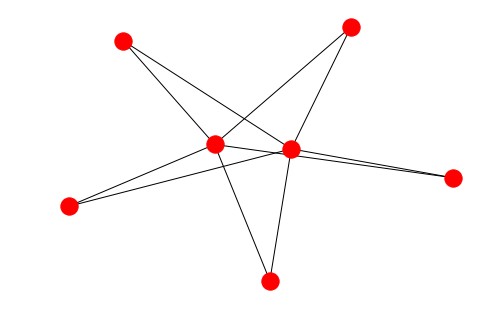

In [200]:
def make_multi_bridge_graph(n):
    """ a neural network with 1 node as input,
        and 1 node as output, which looks a bit
        like 2 nodes connected by multiple bridges
    """
    
    G = nx.Graph()
    
    #create nodes 0,1,2,3, ,... n-1
    for i in range(n):
        G.add_node(i)

    # add edges: every 'internal' node
    # which are defined by 1,2,3,4,n-2
    # are connected to the end nodes
    # 0 and n-1
    for i in range(1,n-1):
        G.add_edge(0,i)
        G.add_edge(n-1,i)
        
    return G
    
n = 7
G = make_multi_bridge_graph(n)
nx.draw(G)

Its rendered poorly, but gets the point across

In [214]:
bs = np.array(nx.betweenness_centrality(G,normalized=False, endpoints=True).values())
bs /= sum(bs)
bs

array([0.20754717, 0.11698113, 0.11698113, 0.11698113, 0.11698113,
       0.11698113, 0.20754717])

In [222]:
bs / min(bs)

array([1.77419355, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.77419355])

In [217]:
T = 10**5
ps = np.zeros(G.number_of_nodes())
ps = f.urban_explorer_stationary_densities(G,ps,T)
ps = ps / sum(ps)
ps

array([0.25082749, 0.099779  , 0.100339  , 0.099869  , 0.100039  ,
       0.099969  , 0.24917751])

In [220]:
ps / min(ps)

array([2.51383043, 1.        , 1.00561235, 1.00090198, 1.00260573,
       1.00190419, 2.49729405])

### Change taxi-drive to include endpoints

In [227]:
def urban_explorer_stationary_densities_with_start(G,counts,T):
    """
    Does an urban explorer process on the nx.graph G for T timesteps.
    Counts[i] = number of times nodes i has been touched. I'll feed this in
    as an arrays of zeros to start. But I can run simulations back-to-back
    if I need to. 
    """

    nodes = [node for node in G.nodes()]
    Ts = []
    trial = 0
    
    paths = compute_and_save_all_shortest_paths(G)
    
    trial += 1
    time = 0
    current_position = np.random.choice(nodes)
    counts[current_position] += 1
    while time < T:
        nodes_minus_origin = nodes[:current_position] + nodes[current_position+1:]
        destination = np.random.choice(nodes_minus_origin)

        #Pick one of possibly many shortest paths
        all_shortest_paths = paths[current_position][destination]
        temp = np.random.choice(range(len(all_shortest_paths)))
        path = all_shortest_paths[temp]

        #Traverse path
        for node in path:
            counts[node] += 1
            time += 1
        current_position = destination
    return counts

In [229]:
T = 10**6
ps = np.zeros(G.number_of_nodes())
ps = urban_explorer_stationary_densities_with_start(G,ps,T)
ps = ps / sum(ps)
ps / min(ps)

array([1.78946236, 1.00526624, 1.        , 1.00778749, 1.01050666,
       1.00875125, 1.78319795])

Good, it agrees! That closes it...

In [235]:
num_nodes, T = 5, 10**4
G = nx.path_graph(num_nodes)
bs_path = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_path = bs_path / sum(bs_path)
counts = np.zeros(G.number_of_nodes())
counts = urban_explorer_stationary_densities_with_start(G,counts,T)
counts_path = counts / sum(counts)
bs_path, counts_path

(array([0.13333333, 0.23333333, 0.26666667, 0.23333333, 0.13333333]),
 array([0.13545936, 0.23083075, 0.26402079, 0.23352994, 0.13615915]))